In [2]:
# Import libraries
# PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

from torch import Tensor

# Torchvision for data transformations
import torchvision
from torchvision import datasets, transforms

# Torchinfo to display model summaries
from torchinfo import summary

# Numpy and Pathlib for data handling
import numpy as np
from pathlib import Path

# Tqdm for progress bars
from tqdm.auto import tqdm

# Import the 'os' module, which provides functions for interacting with the operating system.
# This module is useful for tasks like handling file paths, creating directories, and managing files.
import os

# Import specific types from the 'typing' module, which provides support for type hints in Python.
# 'Optional' is used for indicating that a variable might be of a certain type or None.
# 'Union' allows a variable to be one of several types.
# 'Tuple' is used to specify a fixed-size sequence of elements of specified types.
from typing import Optional, Union, Tuple

# Monai for medical imaging, specific to preprocessing and loss functions
import monai
from monai.transforms import LoadImage
# from monai.losses import DiceLoss

# Matplotlib for data visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import the 'glob' module, which provides a way to retrieve files matching a specified pattern. 
# This is useful for loading multiple image and mask files from directories.
import glob
# Import the 'Image' class from the 'PIL' (Python Imaging Library) module.
# This class allows us to open, manipulate, and save various image file formats.
from PIL import Image

# Check and display library versions for reproducibility
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Monai version: {monai.__version__}")

import copy
import os
import random
import shutil
import zipfile
from math import atan2, cos, sin, sqrt, pi, log

#import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
from numpy import linalg as LA
from torch import optim, nn
from torch.utils.data import DataLoader, random_split
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from tqdm import tqdm


PyTorch version: 2.6.0+cu118
Torchvision version: 0.21.0+cu118
Numpy version: 1.26.4
Monai version: 1.4.1rc1+46.gb58e883c


In [3]:
import os

os.environ["nnUNet_raw"] = r"D:\PIR_SEP\nnunet_data\nnUNet_raw"
os.environ["nnUNet_preprocessed"] = r"D:\PIR_SEP\nnunet_data\nnUNet_preprocessed"
os.environ["nnUNet_results"] = r"D:\PIR_SEP\nnunet_data\nnUNet_results"


In [4]:
# Device setup
# Use GPU if available for faster training, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
!which python

Using device: cuda
True
2.6.0+cu118
11.8
90100
/c/Users/sofia/anaconda3/envs/monai-dev/python


In [6]:
!nnUNetv2_train 300 2d all -tr nnUNetTrainer_250epochs

^C


In [ ]:
import time
import json
import os
import matplotlib.pyplot as plt

# 📁 Dossier où nnU-Net enregistre les pertes
trainer_dir = "D:/PIR_SEP/nnunet_data/nnUNet_results/Dataset300_Sep/nnUNetTrainer_10epochs__nnUNetPlans__2d"

# 📄 Fichier JSON mis à jour à chaque epoch
score_file = os.path.join(trainer_dir, "progress.json")

# 🔁 Boucle de suivi (arrête avec interrupteur dans Jupyter)
train_losses = []
val_losses = []
plt.ion()
fig, ax = plt.subplots(figsize=(8, 5))

print("📈 Suivi des courbes de perte en temps réel (Ctrl+C pour stopper)")

while True:
    try:
        if os.path.exists(score_file):
            with open(score_file) as f:
                data = json.load(f)
                train_losses = data.get("train_losses", [])
                val_losses = data.get("val_losses", [])
                
                ax.clear()
                ax.plot(train_losses, label="Train Loss", marker='o')
                ax.plot(val_losses, label="Val Loss", marker='s')
                ax.set_xlabel("Epoch")
                ax.set_ylabel("Loss")
                ax.set_title("Évolution des pertes")
                ax.grid(True)
                ax.legend()
                plt.pause(1.5)
        else:
            print("⏳ En attente de progress.json...")
        time.sleep(5)
    except KeyboardInterrupt:
        print("🛑 Suivi interrompu.")
        break


In [21]:
!nnUNetv2_predict -d 300 -c 2d -f all \
-tr nnUNetTrainer_10epochs \
-i "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/imagesTs" \
-o "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/preds" \
--verbose


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 9 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 9 cases that I would like to predict

Predicting Patient-52_52:
perform_everything_on_device: True
Input shape: torch.Size([1, 1, 256, 523])
step_size: 0.5
mirror_axes: (0, 1)
n_steps 1, image size is torch.Size([1, 320, 576]), tile_size [320, 576], tile_step_size 0.5
steps:
[[0], [0]]
move image to device cuda
preallocating results arrays on device cuda
Prediction done
sending off prediction to background worker for resampling and export
done with Patient-52_52

Predict


100%|##########| 1/1 [00:03<00:00,  3.61s/it]

100%|##########| 2/2 [00:00<00:00,  4.92it/s]

100%|##########| 2/2 [00:00<00:00,  4.96it/s]

100%|##########| 1/1 [00:00<00:00, 12.68it/s]

100%|##########| 1/1 [00:00<00:00, 13.02it/s]

100%|##########| 1/1 [00:00<00:00, 15.03it/s]

100%|##########| 1/1 [00:00<00:00, 21.22it/s]

100%|##########| 1/1 [00:00<00:00, 20.47it/s]

100%|##########| 1/1 [00:00<00:00, 16.43it/s]


In [29]:
import os
print(os.listdir("D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/labels_nifti"))


['Patient-52_52.nii.gz', 'Patient-53_53.nii.gz', 'Patient-54_54.nii.gz', 'Patient-55_55.nii.gz', 'Patient-56_56.nii.gz', 'Patient-57_57.nii.gz', 'Patient-58_58.nii.gz', 'Patient-59_59.nii.gz', 'Patient-60_60.nii.gz']


In [30]:
import os
import numpy as np
from PIL import Image
from medpy.metric.binary import hd95  # Assure-toi que medpy est installé (pip install medpy)

def load_png_as_binary(path, threshold=0):
    """
    Charge une image PNG en niveau de gris puis la convertit en binaire.
    Les pixels > threshold sont considérés comme foreground.
    """
    img = Image.open(path).convert("L")
    arr = np.array(img)
    # On considère que les pixels non nuls (ex: 255) sont le foreground.
    return (arr > threshold).astype(np.uint8)

def dice_score(seg_gt, seg_pred):
    """
    Calcule le Dice coefficient entre deux masques binaires.
    """
    seg_gt = seg_gt.astype(bool)
    seg_pred = seg_pred.astype(bool)
    intersection = np.sum(seg_gt & seg_pred)
    if np.sum(seg_gt) + np.sum(seg_pred) == 0:
        return 1.0  # Si les deux masques sont vides, Dice=1
    return 2.0 * intersection / (np.sum(seg_gt) + np.sum(seg_pred))

# Dossiers contenant tes PNG de vérité terrain (GT) et de prédiction
gt_folder = r"D:\PIR_SEP\nnunet_data\nnUNet_raw\Dataset300_Sep\labelsTs"
pred_folder = r"D:\PIR_SEP\nnunet_data\nnUNet_raw\Dataset300_Sep\preds"

# Obtenir la liste des fichiers (en supposant que les noms correspondent)
gt_files = sorted([f for f in os.listdir(gt_folder) if f.endswith(".png")])
pred_files = sorted([f for f in os.listdir(pred_folder) if f.endswith(".png")])

if len(gt_files) == 0 or len(pred_files) == 0:
    raise RuntimeError("Vérifie que tes dossiers contiennent bien des fichiers PNG.")

# On suppose qu'ils sont appariés par nom (par exemple, Patient-52_52.png dans gt et dans preds)
scores = {}
for gt_file in gt_files:
    # Pour chaque fichier, on recherche le même nom dans preds (ou un nom similaire)
    pred_file = gt_file  # si le nom est identique
    gt_path = os.path.join(gt_folder, gt_file)
    pred_path = os.path.join(pred_folder, pred_file)
    if not os.path.exists(pred_path):
        print(f"Attention, le fichier de prédiction correspondant à {gt_file} est introuvable.")
        continue

    gt_seg = load_png_as_binary(gt_path)
    pred_seg = load_png_as_binary(pred_path)

    dice = dice_score(gt_seg, pred_seg)
    try:
        hd95_val = hd95(pred_seg, gt_seg)
    except Exception as e:
        print(f"Erreur lors du calcul de HD95 pour {gt_file}: {e}")
        hd95_val = np.nan

    scores[gt_file] = {"Dice": dice, "HD95": hd95_val}
    print(f"{gt_file} => Dice: {dice:.4f}, HD95: {hd95_val:.2f}")

# Pour résumé global, on peut calculer la moyenne
all_dice = [v["Dice"] for v in scores.values() if not np.isnan(v["Dice"])]
all_hd95 = [v["HD95"] for v in scores.values() if not np.isnan(v["HD95"])]
mean_dice = np.mean(all_dice) if all_dice else np.nan
mean_hd95 = np.mean(all_hd95) if all_hd95 else np.nan

print("\n=== Résumé Global ===")
print(f"Mean Dice: {mean_dice:.4f}")
print(f"Mean HD95: {mean_hd95:.2f}")


Patient-52_52.png => Dice: 0.4317, HD95: 319.78
Patient-53_53.png => Dice: 0.0260, HD95: 290.17
Patient-54_54.png => Dice: 0.2967, HD95: 328.88
Patient-55_55.png => Dice: 0.2167, HD95: 382.06
Patient-56_56.png => Dice: 0.0000, HD95: 287.20
Patient-57_57.png => Dice: 0.1489, HD95: 288.61
Patient-58_58.png => Dice: 0.5174, HD95: 362.15
Patient-59_59.png => Dice: 0.2356, HD95: 301.85
Patient-60_60.png => Dice: 0.1246, HD95: 392.38

=== Résumé Global ===
Mean Dice: 0.2220
Mean HD95: 328.12


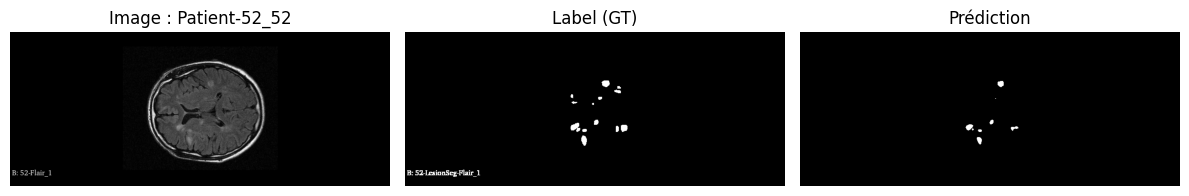

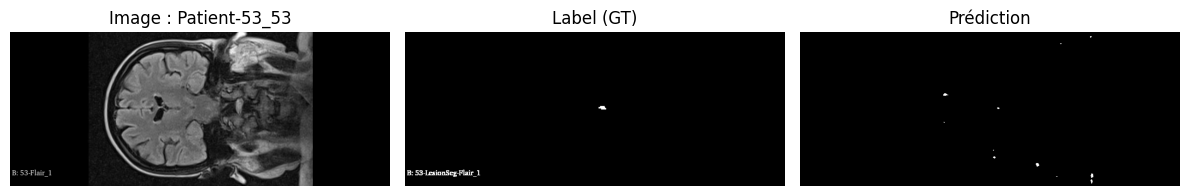

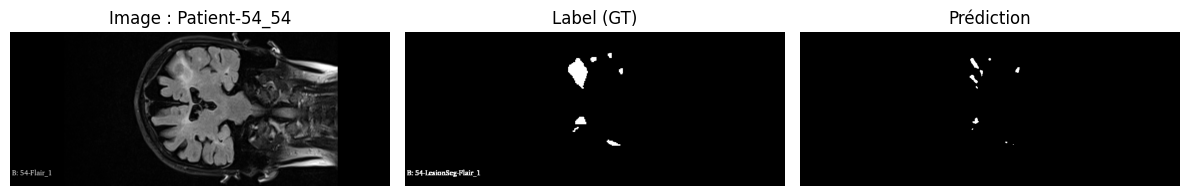

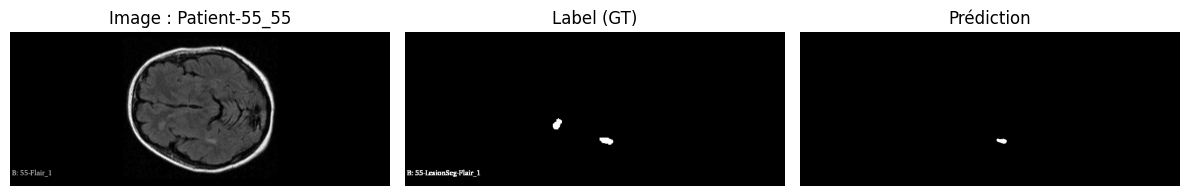

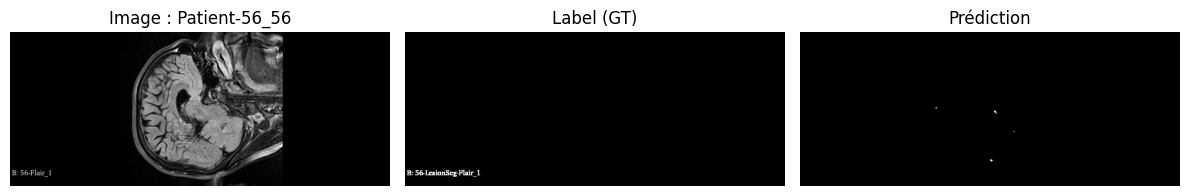

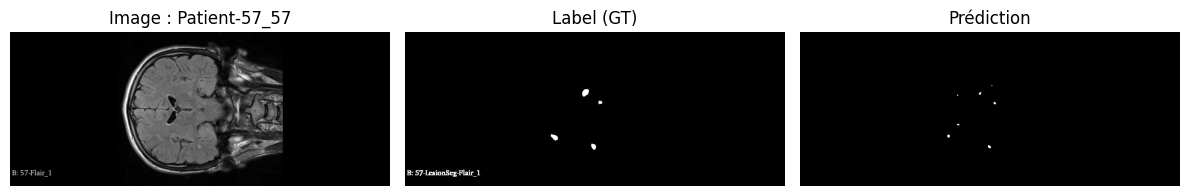

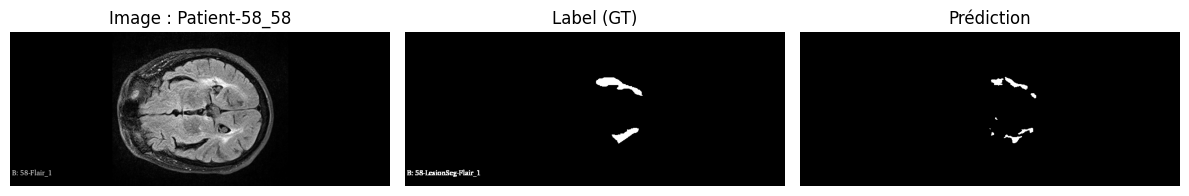

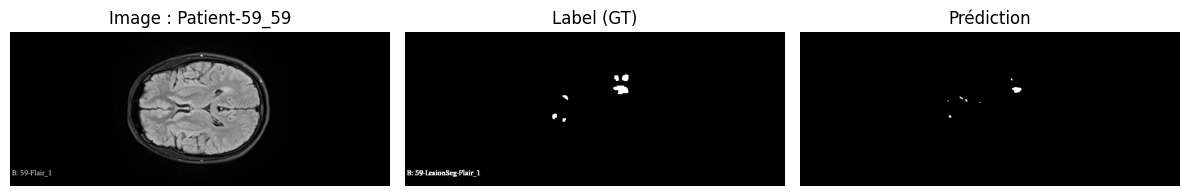

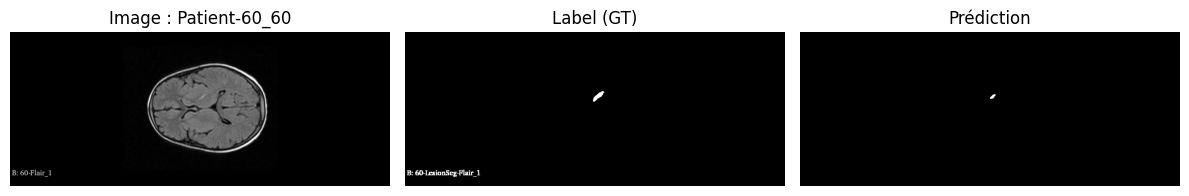

In [31]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 📁 Dossiers
images_dir = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/imagesTs"
labels_dir = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/labelsTs"
preds_dir  = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/preds"

# 📄 Lister les patients à afficher
patients = sorted([f for f in os.listdir(images_dir) if f.endswith("_0000.png")])

# 🔁 Visualiser quelques cas
for patient_file in patients:
    pid = patient_file.replace("_0000.png", "")
    
    # 📥 Charger les fichiers
    img = np.array(Image.open(os.path.join(images_dir, f"{pid}_0000.png")).convert("L"))
    lbl = np.array(Image.open(os.path.join(labels_dir, f"{pid}.png")).convert("L"))
    pred = np.array(Image.open(os.path.join(preds_dir, f"{pid}.png")).convert("L"))
    
    # 🎨 Multiplier mask binaire → pour affichage clair
    lbl_disp = (lbl > 0).astype(np.uint8) * 255
    pred_disp = (pred > 0).astype(np.uint8) * 255

    # 📊 Affichage
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title(f"Image : {pid}")
    axs[1].imshow(lbl_disp, cmap="gray")
    axs[1].set_title("Label (GT)")
    axs[2].imshow(pred_disp, cmap="gray")
    axs[2].set_title("Prédiction")
    for ax in axs: ax.axis("off")
    plt.tight_layout()
    plt.show()


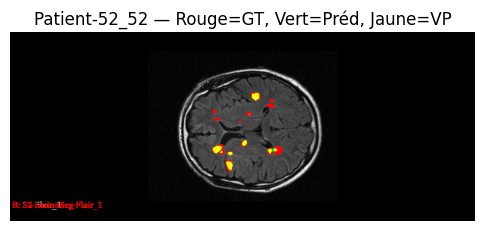

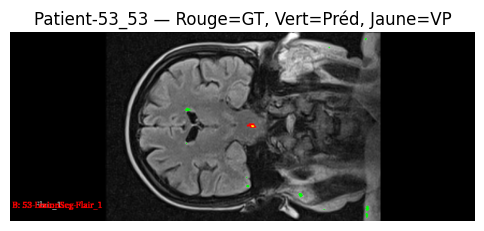

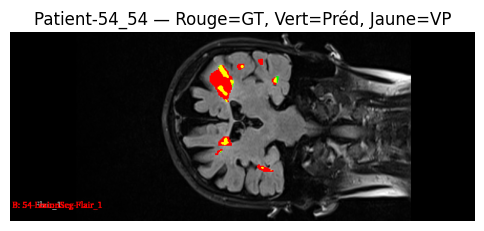

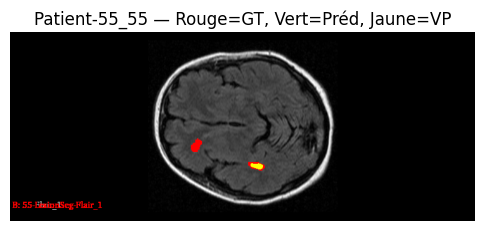

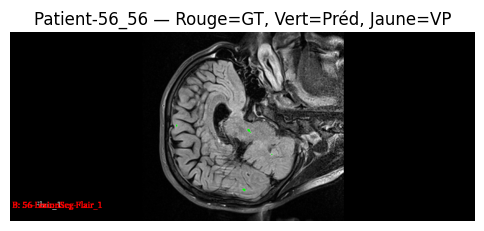

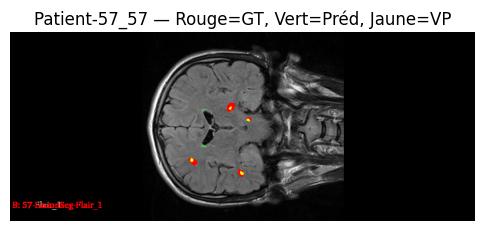

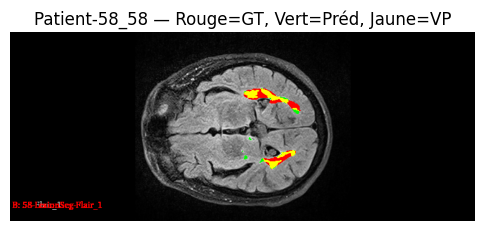

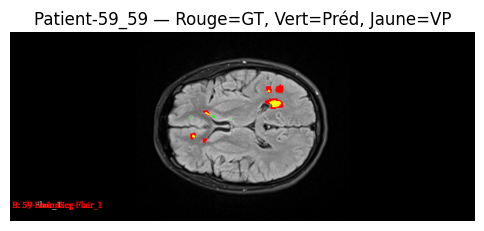

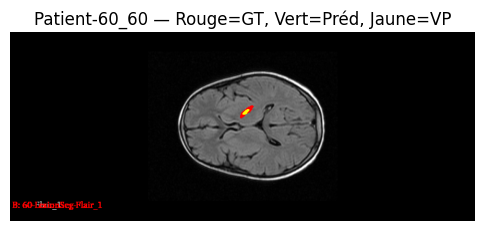

In [32]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 📁 Dossiers
images_dir = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/imagesTs"
labels_dir = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/labelsTs"
preds_dir  = "D:/PIR_SEP/nnunet_data/nnUNet_raw/Dataset300_Sep/preds"

# 📄 Lister les patients
patients = sorted([f for f in os.listdir(images_dir) if f.endswith("_0000.png")])

# 🔁 Visualiser quelques cas
for patient_file in patients:
    pid = patient_file.replace("_0000.png", "")
    
    # 📥 Charger l'image, le GT et la prédiction
    img  = np.array(Image.open(os.path.join(images_dir, f"{pid}_0000.png")).convert("L"))
    gt   = np.array(Image.open(os.path.join(labels_dir, f"{pid}.png")).convert("L"))
    pred = np.array(Image.open(os.path.join(preds_dir, f"{pid}.png")).convert("L"))

    # 🧼 Binariser
    gt = (gt > 0).astype(np.uint8)
    pred = (pred > 0).astype(np.uint8)

    # 🎨 Créer une image RGB pour overlay
    overlay = np.stack([img, img, img], axis=-1)  # shape (H, W, 3)
    
    # 🔴 GT en rouge : canal R
    overlay[gt == 1] = [255, 0, 0]

    # 🟢 Pred en vert : canal G
    # Si prédiction ET GT, on met jaune
    overlay[(pred == 1) & (gt == 0)] = [0, 255, 0]
    overlay[(pred == 1) & (gt == 1)] = [255, 255, 0]  # Jaune si vrai positif

    # 📊 Affichage
    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.title(f"{pid} — Rouge=GT, Vert=Préd, Jaune=VP")
    plt.axis("off")
    plt.show()
